# Shapefiles with pyshp

https://pypi.python.org/pypi/pyshp

Vector data format for geospatial applications. Created by Esri, publishers of ArcGIS, with mostly open specification.

Can be read by basemap with some restrictions.
Dedicated packages such as pyshp are more versatile. 


In [143]:
# Import everything that we are going to need... but not more

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shapefile

%matplotlib inline

map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='l', projection='tmerc', lat_0 = 50, lon_0 = 1)

#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')
#map.drawcoastlines()


#map.readshapefile('../data/CP2_regions/CP2_new_edit', 'CP2_new_edit')



In [144]:
sf = shapefile.Reader("../data/gebco_200_clip/gebco_200_clip.shp")
shelf = sf.shapes()
len(shelf)

# Print attributes
for name in dir(shelf[0]):
    if not name.startswith('__'):
        print(name)


bbox
parts
points
shapeType
z


In [145]:
# bounding box in lon,lat
shelf[0].bbox

[-11.912499999475358, 40.06666564900053, 10.908333333816344, 65.00104522685577]

In [146]:
# points making up the polygon
print(len(shelf[0].points))
shelf[0].points[0:3]

15408


[(10.443753534697919, 65.00104522685581),
 (10.441666666883236, 64.99861094194148),
 (10.437162272121213, 64.99617106144541)]

In [147]:
# Let's read another file with multiple objects
sf = shapefile.Reader("../data/CP2_regions/CP2_new_edit.shp")
CP2=sf.shapes()
len(CP2)

10

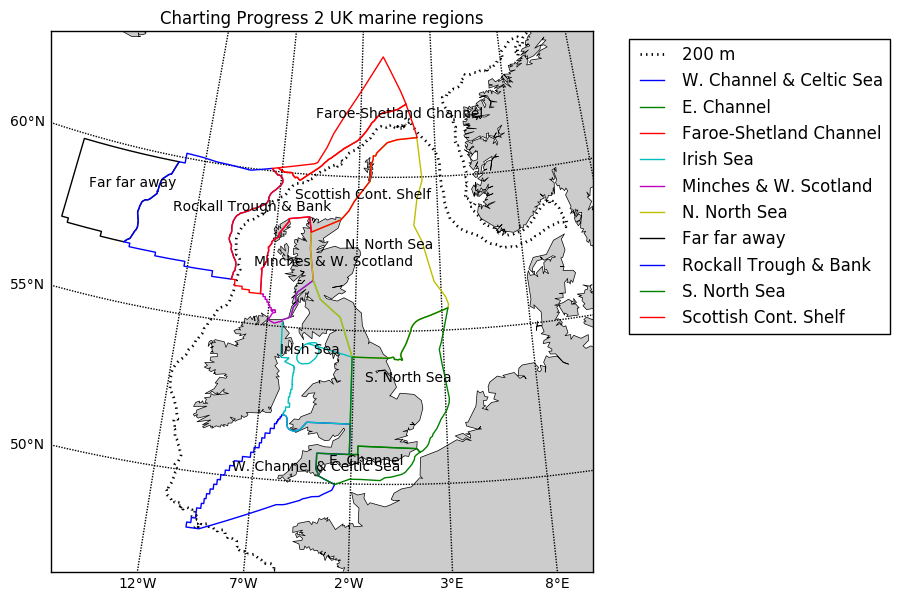

In [148]:
# Because this shapfile doesn't have polygon labels, we will have to create them

CP2_labels=['W. Channel & Celtic Sea',
'E. Channel',
'Faroe-Shetland Channel',
'Irish Sea',
'Minches & W. Scotland',
'N. North Sea',
'Far far away',
'Rockall Trough & Bank',
'S. North Sea',
'Scottish Cont. Shelf']

fig = plt.figure(figsize=(7,7))
# create polar stereographic Basemap instance.
m = Basemap(projection='stere', lon_0=0.,lat_0=50.,
            llcrnrlat=46,urcrnrlat=64,
            llcrnrlon=-16,urcrnrlon=15,resolution='l')
# bondaries resolution can be 'c','l','i','h' or 'f'

m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='0.8')

parallels = np.arange(-45,63,5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)

meridians = np.arange(-12,18,5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)


# Plot 200 m  countour
pointsx=np.array(shelf[0].points)[:,0]
pointsy=np.array(shelf[0].points)[:,1]
m.plot(pointsx,pointsy,latlon=True,linestyle=':',linewidth=2.0,color='k',label='200 m')

offset=2.0
for i,shapes in enumerate(CP2):
    
    # plots points in shape and associate label
    pointsx=np.array(shapes.points)[:,0]
    pointsy=np.array(shapes.points)[:,1]
    m.plot(pointsx,pointsy,latlon=True,label=CP2_labels[i])

    # add text in the middle of the respective boundig boxes
    midlon=(CP2[i].bbox[0]+CP2[i].bbox[2])/2-offset
    midlat=(CP2[i].bbox[1]+CP2[i].bbox[3])/2
    x,y=m(midlon,midlat)
    plt.text(x,y,CP2_labels[i],fontsize=10)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Charting Progress 2 UK marine regions')
